<a href="https://colab.research.google.com/github/Thunradee/Expedia-Hotel-Recommendations/blob/main/(Demo)_Final_Project_Expedia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Final Project (Demo): Expedia datasets

###Geeratigan Arsanathong

###Thunradee Tangsupakij

Dataset : https://www.kaggle.com/c/expedia-hotel-recommendations/data

In [ ]:
# Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Data Processing

In [ ]:
# Read in train.csv file
data = pd.read_csv("/content/gdrive/My Drive/IntroML/train.csv")
print('Data shape:', data.shape)
data.head()

Data shape: (37670293, 24)


,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,9,2014-08-27,2014-08-31,2,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,9,2014-08-29,2014-09-02,2,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,9,2014-08-29,2014-09-02,2,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,3,2014-11-23,2014-11-28,2,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,3,2014-11-23,2014-11-28,2,0,1,14984,1,0,1,2,50,1457,21


In [ ]:
# Read in destinations.csv file
destination = pd.read_csv("/content/gdrive/My Drive/IntroML/destinations.csv")
print('Destination shape:', destination.shape)
destination.head()

Destination shape: (62106, 150)


,srch_destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15,d16,d17,d18,d19,d20,d21,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31,d32,d33,d34,d35,d36,d37,d38,d39,...,d110,d111,d112,d113,d114,d115,d116,d117,d118,d119,d120,d121,d122,d123,d124,d125,d126,d127,d128,d129,d130,d131,d132,d133,d134,d135,d136,d137,d138,d139,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
0,0,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,...,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657
1,1,-2.181690,-2.181690,-2.181690,-2.082564,-2.181690,-2.165028,-2.181690,-2.181690,-2.031597,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.043789,-2.181690,-2.181690,...,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.133508,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.133508,-2.181690,-2.181690,-2.181690,-2.148982,-2.181690,-2.181690,-2.181690,-2.181690,-2.148982,-2.181690,-2.181690,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
2,2,-2.183490,-2.224164,-2.224164,-2.189562,-2.105819,-2.075407,-2.224164,-2.118483,-2.140393,-2.224164,-2.209855,-2.224164,-2.110723,-2.186008,-2.224164,-2.124474,-2.224164,-2.156467,-2.224164,-2.224164,-2.224164,-2.224164,-2.224164,-2.224164,-2.224164,-2.224164,-2.224164,-2.224164,-2.153316,-2.186008,-2.224164,-2.224164,-2.224164,-2.128237,-2.158309,-2.059716,-1.910270,-2.224164,-2.123050,...,-2.140393,-2.224164,-2.164722,-2.224164,-2.154997,-2.197327,-2.224164,-2.197327,-2.224164,-2.224164,-2.197327,-2.187005,-2.026263,-2.224164,-2.224164,-2.224164,-2.223818,-2.224164,-2.049280,-2.189562,-2.118483,-2.145558,-2.117811,-2.224164,-2.180182,-2.224164,-2.224164,-2.214572,-2.186008,-2.191569,-2.224164,-2.224164,-2.196379,-2.224164,-2.192009,-2.224164,-2.224164,-2.224164,-2.224164,-2.057548
3,3,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.115485,-2.177409,-2.177409,-2.177409,-2.177409,-2.161081,-2.177409,-2.177409,-2.177409,-2.177409,-2.130158,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.101291,-2.177409,-2.177409,...,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.115485,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.161081,-2.177409,-2.177409,-2.161081,-2.130158,-2.177409,-2.177409,-2.177409,-2.177409,-2.115485,-2.177409,-2.161081,-2.161081,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409
4,4,-2.189562,-2.187783,-2.194008,-2.171153,-2.152303,-2.056618,-2.194008,-2.194008,-2.145911,-2.194008,-2.089094,-2.194008,-2.155205,-2.070995,-2.194008,-2.074964,-2.185526,-2.194008,-2.189562,-2.191779,-2.185032,-2.150215,-2.194008,-2.189233,-2.194008,-2.191631,-2.146025,-2.194008,-2.130263,-2.177813,-2.194008,-2.159651,-2.194008,-2.170700,-2.194008,-2.194008,-1.946523,-2.191779,-2.194008,...,-2.180027,-2.194008,-2.194008,-2.19400

In [ ]:
# Checking the data type
data.dtypes

date_time                     object
site_name                      int64
posa_continent                 int64
user_location_country          int64
user_location_region           int64
user_location_city             int64
orig_destination_distance    float64
user_id                        int64
is_mobile                      int64
is_package                     int64
channel                        int64
srch_ci                       object
srch_co                       object
srch_adults_cnt                int64
srch_children_cnt              int64
srch_rm_cnt                    int64
srch_destination_id            int64
srch_destination_type_id       int64
is_booking                     int64
cnt                            int64
hotel_continent                int64
hotel_country                  int64
hotel_market                   int64
hotel_cluster                  int64
dtype: object

In [ ]:
# Find Expedia.com by assuming that it should generates the highest transaction number
data.groupby('site_name').count()

,date_time,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
site_name,,,,,,,,,,,,,,,,,,,,,,,
2,23790351,23790351,23790351,23790351,23790351,18136146,23790351,23790351,23790351,23790351,23767925,23767922,23790351,23790351,23790351,23790351,23790351,23790351,23790351,23790351,23790351,23790351,23790351
3,2,2,2,2,2,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
4,5,5,5,5,5,0,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
5,11,11,11,11,11,0,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
6,13748,13748,13748,13748,13748,279,13748,13748,13748,13748,13713,13713,13748,13748,13748,13748,13748,13748,13748,13748,13748,13748,13748
7,33522,33522,33522,33522,33522,895,33522,33522,33522,33522,33478,33478,33522,33522,33522,33522,33522,33522,33522,33522,33522,33522,33522
8,943325,943325,943325,943325,943325,698816,943325,943325,943325,943325,941903,941903,943325,943325,943325,943325,943325,943325,943325,943325,943325,943325,943325
9,39882,39882,39882,39882,39882,328,39882,39882,39882,39882,39852,39851,39882,39882,39882,39882,39882,39882,39882,39882,39882,39882,39882
10,98754,98754,98754,98754,98754,90732,98754,98754,98754,98754,98704,98704,98754,98754,98754,98754,98754,98754,98754,98754,98754,98754,98754


As the above result, we can see that site_name == 2 has the most number of transaction (23790351). We assume that site_name == 2 is Expedia.com.

In [ ]:
# Select only transactions of Expedia.com
data = data[data['site_name'] == 2]
print('Data shape:', data.shape)
data.head()

Data shape: (23790351, 24)


,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,9,2014-08-27,2014-08-31,2,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,9,2014-08-29,2014-09-02,2,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,9,2014-08-29,2014-09-02,2,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,3,2014-11-23,2014-11-28,2,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,3,2014-11-23,2014-11-28,2,0,1,14984,1,0,1,2,50,1457,21


In [ ]:
# Rows containing duplicate data
duplicate_rows_df = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

# Dropping the duplicates 
data = data.drop_duplicates()

number of duplicate rows:  (453, 24)


In [ ]:
# Finding the null values
print("train.csv")
print(data.isnull().sum())
print()
print("destinations.csv")
print(destination.isnull().sum())

train.csv
date_time                          0
site_name                          0
posa_continent                     0
user_location_country              0
user_location_region               0
user_location_city                 0
orig_destination_distance    5653758
user_id                            0
is_mobile                          0
is_package                         0
channel                            0
srch_ci                        22425
srch_co                        22428
srch_adults_cnt                    0
srch_children_cnt                  0
srch_rm_cnt                        0
srch_destination_id                0
srch_destination_type_id           0
is_booking                         0
cnt                                0
hotel_continent                    0
hotel_country                      0
hotel_market                       0
hotel_cluster                      0
dtype: int64

destinations.csv
srch_destination_id    0
d1                     0
d2                   

In [ ]:
# For the simplifcation, we drop all the missing values
data = data.dropna() 
data.shape

(18117754, 24)

#Destination.csv

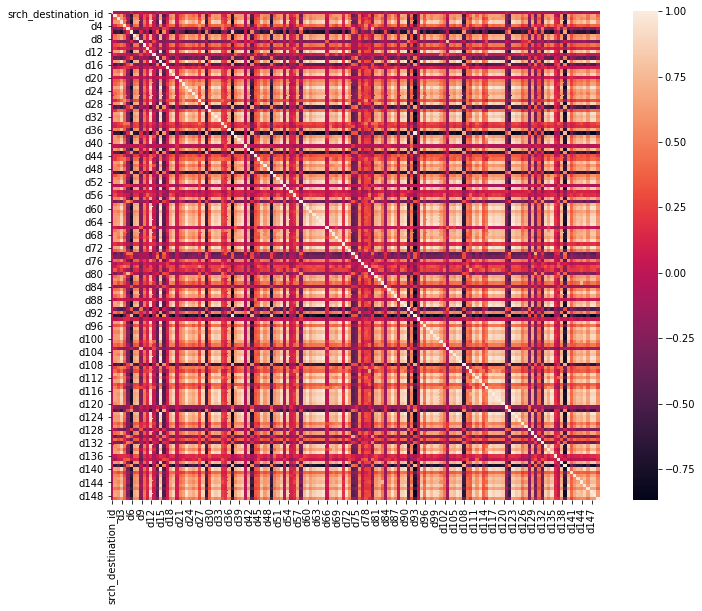

In [ ]:
#Heat map of correletion matrix
corr = destination.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr, vmax=1, square=True)

In [ ]:
#remove one of features that have a correlation higher than 0.9
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9 or corr.iloc[i,j] <= -0.9:
            if columns[j]:
                columns[j] = False
selected_columns = destination.columns[columns]
destination_new = destination[selected_columns]  

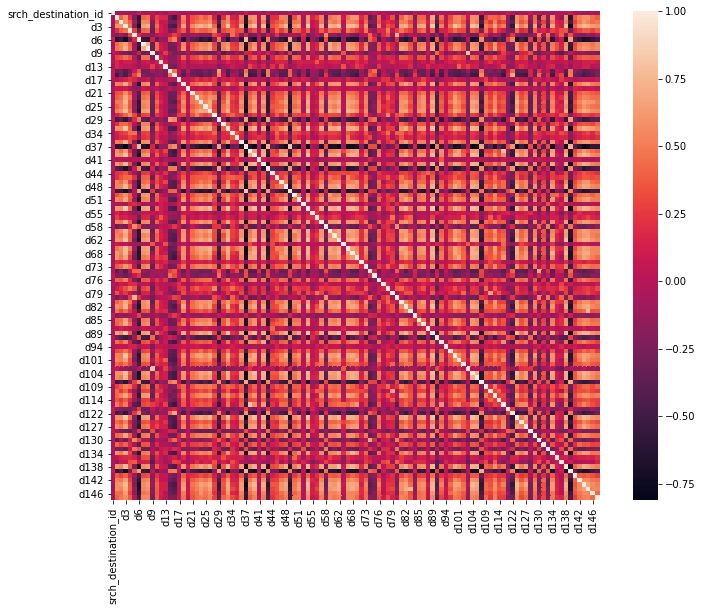

In [ ]:
#Heat map of correletion matrix after we drop the hight correlation
corr_new = destination_new.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr_new, vmax=1, square=True)

In [ ]:
destination_new.to_csv('/content/gdrive/My Drive/IntroML/destination_new.csv', index=False)
print(destination_new.shape)
destination_new.head()

(62106, 110)


,srch_destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d13,d14,d16,d17,d18,d20,d21,d22,d24,d25,d26,d27,d29,d30,d32,d34,d35,d36,d37,d38,d39,d41,d42,d43,d44,d45,d47,d48,...,d87,d88,d89,d91,d92,d94,d96,d98,d101,d102,d103,d104,d105,d108,d109,d110,d112,d114,d115,d121,d122,d124,d126,d127,d128,d129,d130,d131,d132,d134,d136,d137,d138,d139,d141,d142,d143,d144,d146,d149
0,0,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-2.198657,-2.198657,...,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657
1,1,-2.181690,-2.181690,-2.181690,-2.082564,-2.181690,-2.165028,-2.181690,-2.181690,-2.031597,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.043789,-2.181690,-2.181690,-2.165028,-2.181690,-2.133508,-2.181690,-2.181690,-2.181690,-2.181690,...,-2.181690,-2.181690,-2.181690,-2.082564,-2.181690,-2.181690,-2.181690,-2.082564,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.148982,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.133508,-2.181690,-2.181690,-2.181690,-2.133508,-2.181690,-2.181690,-2.181690,-2.148982,-2.181690,-2.181690,-2.148982,-2.181690,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
2,2,-2.183490,-2.224164,-2.224164,-2.189562,-2.105819,-2.075407,-2.224164,-2.118483,-2.140393,-2.224164,-2.209855,-2.110723,-2.186008,-2.124474,-2.224164,-2.156467,-2.224164,-2.224164,-2.224164,-2.224164,-2.224164,-2.224164,-2.224164,-2.153316,-2.186008,-2.224164,-2.128237,-2.158309,-2.059716,-1.910270,-2.224164,-2.123050,-2.154047,-2.197327,-1.945461,-2.224164,-2.224164,-2.166886,-2.192009,...,-2.224164,-2.160492,-2.224164,-2.076796,-2.224164,-2.166149,-2.224164,-2.224164,-2.224164,-2.072359,-2.100277,-2.224164,-2.203533,-2.094364,-2.224164,-2.140393,-2.164722,-2.154997,-2.197327,-2.187005,-2.026263,-2.224164,-2.223818,-2.224164,-2.049280,-2.189562,-2.118483,-2.145558,-2.117811,-2.180182,-2.224164,-2.214572,-2.186008,-2.191569,-2.224164,-2.196379,-2.224164,-2.192009,-2.224164,-2.057548
3,3,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.115485,-2.177409,-2.177409,-2.177409,-2.177409,-2.161081,-2.177409,-2.177409,-2.130158,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.101291,-2.177409,-2.177409,-2.177409,-2.177409,-2.145344,-2.177409,-2.177409,-2.145344,-2.177409,...,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.161081,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.115485,-2.177409,-2.177409,-2.177409,-2.177409,-2.161081,-2.177409,-2.177409,-2.161081,-2.130158,-2.177409,-2.177409,-2.115485,-2.177409,-2.161081,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409
4,4,-2.189562,-2.187783,-2.194008,-2.171153,-2.152303,-2.056618,-2.194008,-2.194008,-2.145911,-2.194008,-2.089094,-2.155205,-2.070995,-2.074964,-2.185526,-2.194008,-2.191779,-2.185032,-2.150215,-2.189233,-2.194008,-2.191631,-2.146025,-2.130263,-2.177813,-2.159651,-2.170700,-2.194008,-2.194008,-1.946523,-2.191779,-2.194008,-2.188901,-2.194008,-2.109317,-2.181161,-2.175595,-2.180677,-2.194008,...,-2.194008,-2.176134,-2.194008,-2.194008,-2.194

#Data.csv

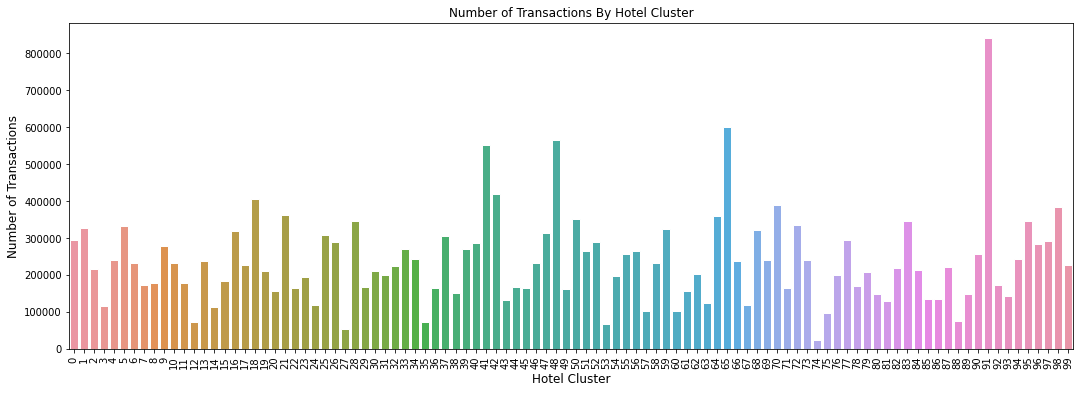

In [ ]:
# Plot Frequency Distribution of Hotel Cluster
fig, ax = plt.subplots(figsize=(18,6))
sns.set(style="darkgrid")
sns.countplot(x="hotel_cluster", data=data, ax=ax)
plt.title('Number of Transactions By Hotel Cluster')
plt.ylabel('Number of Transactions', fontsize=12)
plt.xlabel('Hotel Cluster', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# split date_time column to date and time columns
data[["date", "time"]] = data.date_time.str.split(" ", expand=True)
data[["year", "month", "date"]] = data.date.str.split("-", expand=True)

# Drop column date_time, site_name, posa_continent, time
data = data.drop(["date_time", "site_name", "posa_continent", "time"], axis=1)

# Split srch_ci and srch_co
data[["ci_year", "ci_month", "ci_date"]] = data.srch_ci.str.split("-", expand=True)
data[["co_year", "co_month", "co_date"]] = data.srch_co.str.split("-", expand=True)

# Drop column srch_ci, srch_co
data = data.drop(["srch_ci", "srch_co"], axis=1)

#  Cast column to int
data[["date", "year", "month", "ci_year", "ci_month", "ci_date", "co_year", "co_month", "co_date"]] = data[
    ["date", "year", "month", "ci_year", "ci_month", "ci_date", "co_year", "co_month", "co_date"]].apply(
    pd.to_numeric)

In [ ]:
# Sperate data to 2013 and 2014
data2013 = data[data["year"] == 2013]
data2014 = data[data["year"] == 2014]

# Write data sets to files
data2013.to_csv("/content/gdrive/My Drive/IntroML/train2013.csv", index=False)
data2014.to_csv("/content/gdrive/My Drive/IntroML/train2014.csv", index=False)

In [ ]:
# Read in train2013.csv file
train = pd.read_csv("/content/gdrive/My Drive/IntroML/train2013.csv")
train.head()

,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,date,year,month,ci_year,ci_month,ci_date,co_year,co_month,co_date
0,66,462,41898,2716.6746,1482,0,0,1,2,0,1,8857,1,0,1,2,50,214,28,15,2013,2,2013,2,24,2013,3,1
1,66,462,41898,2716.5257,1482,0,0,0,2,0,1,8857,1,0,1,2,50,214,73,16,2013,2,2013,2,24,2013,3,1
2,66,462,41898,2722.4856,1482,0,0,0,2,0,1,8857,1,0,1,2,50,214,26,16,2013,2,2013,2,24,2013,3,1
3,66,462,41898,2716.6746,1482,0,0,0,2,0,1,8857,1,0,1,2,50,214,28,16,2013,2,2013,3,1,2013,3,6
4,66,189,2871,2586.0222,3925,1,0,9,3,0,1,4777,3,0,1,2,50,967,42,9,2013,11,2013,12,24,2013,12,26


In [ ]:
# Read in train2014.csv file
test = pd.read_csv("/content/gdrive/My Drive/IntroML/train2014.csv")
test.head()

,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,date,year,month,ci_year,ci_month,ci_date,co_year,co_month,co_date
0,66,348,48862,2234.2641,12,0,1,9,2,0,1,8250,1,0,3,2,50,628,1,11,2014,8,2014,8,27,2014,8,31
1,66,348,48862,2234.2641,12,0,1,9,2,0,1,8250,1,1,1,2,50,628,1,11,2014,8,2014,8,29,2014,9,2
2,66,348,48862,2234.2641,12,0,0,9,2,0,1,8250,1,0,1,2,50,628,1,11,2014,8,2014,8,29,2014,9,2
3,66,442,35390,913.1932,93,0,0,3,2,0,1,14984,1,0,1,2,50,1457,80,9,2014,8,2014,11,23,2014,11,28
4,66,442,35390,913.6259,93,0,0,3,2,0,1,14984,1,0,1,2,50,1457,21,9,2014,8,2014,11,23,2014,11,28


In [ ]:
# Concatenate train and test sets
df = pd.concat([train, test], ignore_index=True)
df.shape

(18117754, 28)

Text(0.5, 0, 'Check In Month')

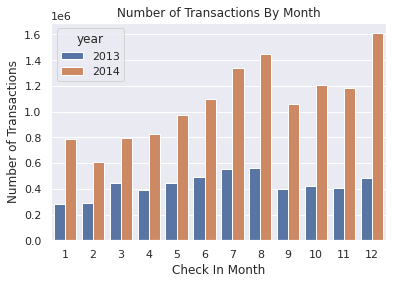

In [ ]:
# Plot number of transactions by month
sns.set(style="darkgrid")
ax = sns.countplot(x="ci_month", hue="year", data=df)
plt.title('Number of Transactions By Month')
plt.ylabel('Number of Transactions', fontsize=12)
plt.xlabel('Check In Month', fontsize=12)

#Merge two dataset

In [ ]:
# Select first 3 months data
trainq1 = train[train["month"] < 4]
testq1 = test[test["month"] < 4]

# Joining data sets
trainq1 = trainq1.set_index('srch_destination_id').join(destination_new.set_index('srch_destination_id'))
print(trainq1.head())

testq1 = testq1.set_index('srch_destination_id').join(destination_new.set_index('srch_destination_id'))
print(testq1.head())

# Write to file
trainq1.to_csv("trainq1set.csv", index=False)
testq1.to_csv("testq1set.csv", index=False)

# Machine Learning Model (using pycharm)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import time

# Setting of no truncate
np.set_printoptions(threshold=np.inf)

# Generate 5 predictions
def getTop5(predictProb):
    top5Tuple = []
     
    # Get top 5 probability 
    # loop each data point
    for prob in predictProb:
        # (class, prob)
        top5 = [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]
        # loop each class
        for i in range(len(prob)):
            if prob[i] > top5[0][1]:
                top5[0] = (i, prob[i])
                top5.sort(key=lambda x: x[1])

        top5Tuple.append(top5)
    
    # Generate a 2-d array of top 5 predictions
    top5Pred = []
    for i in range(len(top5Tuple)):
        thisTop5Tupple = top5Tuple[i]
        top5 = []
        # Make a list of top 5 classes
        for j in range(len(thisTop5Tupple)):
            top5.append(thisTop5Tupple[j][0])
        top5Pred.append(top5)

    return top5Pred

# Generate final prediction for model evaluation
def getFinalPrediction(top5Pred, label):
    finalPred = []
    for i in range(len(label)):
        topPred = top5Pred[i]

        # if one of five predict match with the label
        if label[i] in topPred:
            finalPred.append(label[i])
        else:
            # highest probability
            finalPred.append(topPred[-1])
    return finalPred

def plot_confusion_matrix(cm, target_names):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm, columns=target_names, index=target_names)
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize=(20, 14))
    plt.title("Confusion Matrix")
    sns.set(font_scale=0.8)  # for label size
    sns.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 2})  # font size
    plt.show()

if __name__ == "__main__":
    # read data
    print("Reading data")
    start_time = time.time()

    train = pd.read_csv("trainq1set.csv")
    test = pd.read_csv("testq1set.csv")
    print("Train shape: ", train.shape)  # (1214170, 136)
    print("Test shape: ", test.shape)  # (1946750, 136)
    print("--- %s seconds ---" % (time.time() - start_time))
    print()

    # Drop NA
    train = train.dropna()
    test = test.dropna()

    # Create training and testing sets
    y_train = train['hotel_cluster']
    X_train = train.drop(["hotel_cluster", "user_id"], axis=1)
    y_test = test['hotel_cluster']
    X_test = test.drop(["hotel_cluster", "user_id"], axis=1)

    # Cast type to numpy
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()
    y_train = y_train.to_numpy()
    y_test = y_test.to_numpy()

    # Over-sampling
    print("Re-sampling using SMOTE")
    start_time = time.time()

    over = SMOTE(sampling_strategy='minority')
    X_train, y_train = over.fit_sample(X_train, y_train)
    print("X_train shape:", X_train.shape)
    print("--- %s seconds ---" % (time.time() - start_time))
    print()

    # Grid search
    for n in range(100, 320, 20):
        for d in range(5, 35, 5):
            # Train classifier
            print("Training classifier")
            start_time = time.time()

            clf = RandomForestClassifier(n_estimators=n, max_depth=d)
            clf.fit(X_train, y_train)

            print("--- %s seconds ---" % (time.time() - start_time))
            print()

            # Predict
            print("Predicting")

            start_time = time.time()
            predictProb = clf.predict_proba(X_test)

            print("--- %s seconds ---" % (time.time() - start_time))
            print()

            # Get top 5 predictions
            top5Pred = getTop5(predictProb)

            # Get final predictions for model evaluation
            finalPred = getFinalPrediction(top5Pred, y_test)

            # Make a list of class names
            class_names = (np.unique(y_test)).astype(str)

            # Evaluation
            print("Classification Report")
            print(metrics.classification_report(y_test, finalPred, target_names=class_names))
            print()

            # Confusion Matrix
            cm = metrics.confusion_matrix(y_test, finalPred)
            print("Confusion Matrix")
            print(np.asarray(cm))
            print()
            plot_confusion_matrix(cm, target_names=class_names)
